<a href="https://colab.research.google.com/github/Lidiya-cutie/DS_SkillFactory/blob/main/SkillFactory_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib
import seaborn as sns
import plotly
import matplotlib.pylab as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
churn_data = pd.read_csv('/content/churn.csv') 
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

In [ ]:
churn_data_exited = churn_data['Exited'].value_counts()
fig = go.Figure(data=[go.Pie(labels=['Лояльные клиенты', 'Клиентов ушло'], values=churn_data_exited, pull= .05)])
fig.update_layout(title_text="Cоотношение ушедших и лояльных клиентов")

fig.show()

Как видно из графика, большая часть клиентов остается лояльной к деятельности банка и продолжает пользоваться услугами данного банка

# Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы

In [ ]:
churn_data[churn_data['Balance'] > 2500].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1


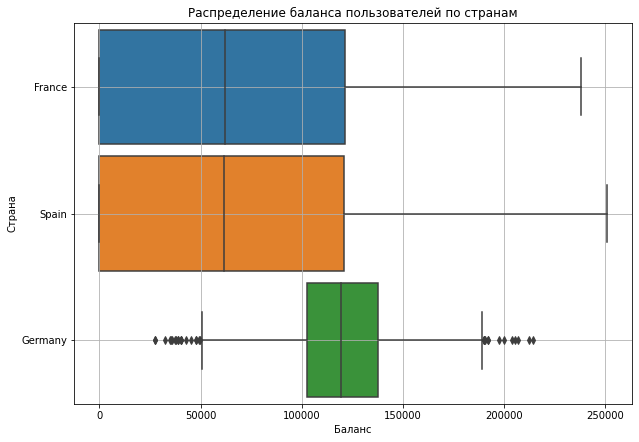

In [ ]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Geography',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей по странам');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Страна');
boxplot.grid()

График свидетельствует о том, что наименьший разброс денежных средств на счетах у пользователей из Германии. У них же в среднем на счетах  больше денежных средств. У пользователей из Франции и Испании примерно одинаково большой разброс денежных средств на счетах, как и средний баланс. Можно сделать вывод, что пользователи из Германии доверяют свои средства данному банку в меньшей степени, нежели представители Франции и Испании.

# Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке

In [ ]:
churn_data.pivot_table(
    values='Balance',
    index='Geography',
    columns='Exited',
    aggfunc='count'
)

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


Text(0.5, 1.0, 'Pаспределение баланса клиента в разрезе признака оттока')

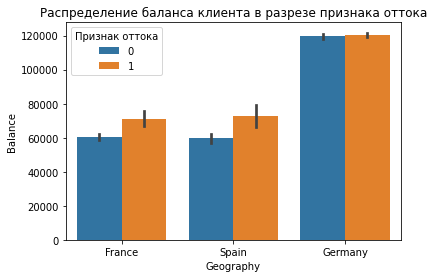

In [ ]:
sns.barplot(data=churn_data, x="Geography", y="Balance", hue="Exited")
plt.legend(loc='upper left', title='Признак оттока')
plt.title('Pаспределение баланса клиента в разрезе признака оттока')

Согласно графику, у лояльных клиентов банка на накопительных счетах суммы денежных средств меньше, чем у ушедших клиентов. Можно сделать вывод, что отток клиентов привел с резкому снижению ликвидности активов банка на территории Франции и Испании.

# Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку

In [ ]:
churn_data.groupby(['Age'])['Exited'].sum()


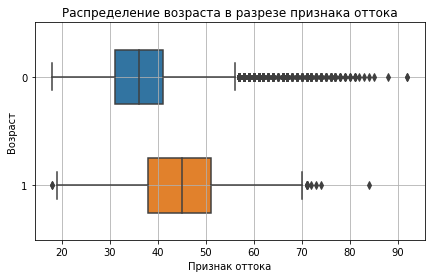

In [ ]:
fig = plt.figure(figsize=(7, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение возраста в разрезе признака оттока');
boxplot.set_xlabel('Признак оттока');
boxplot.set_ylabel('Возраст');
boxplot.grid()

Согласно данному графику Наиболее склонными к  оттоку клиентами являютя пользователи в возрасте от 38 до 51 года. Специалистам банка следует особое внимание обратить на категорию клиентов от 35-37 лет для предотвращения вознивкновения ситуации оттока 
В Группе лояльных клиентов в возрасте от 56 лет наблюдается ниабольшее число потенциальных выбросов

# Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это

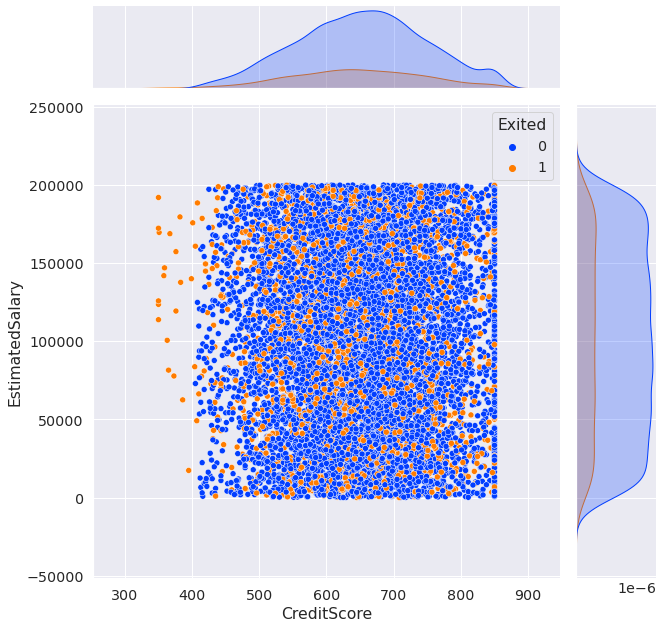

In [ ]:
jointplot = sns.jointplot(
    x = churn_data.CreditScore, 
    y = churn_data.EstimatedSalary, 
    data=churn_data,  
    palette='bright',
    hue='Exited',
    height=9)

sns.set(font_scale=1.3)
plt.show()

Данный график показывает, что взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты практически отсутствует. 

# Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это

In [ ]:
gender_exited = churn_data[churn_data['Exited']==1]['Gender'].value_counts()
gender_exited
fig = go.Figure(data=[go.Pie(labels=['Женщины', 'Мужчины'], values=gender_exited, pull= .05)])
fig.update_layout(title_text="Cоотношение ушедших клиентов в аспекте половой принадлежности")

fig.show()

Согласно данному графику можно с уверенностью сказать, что к оттоку более склонны женщины. Однако, здесь надо провести дополнительное исследование на основе одинакового числа женщин и мужчин, тк данный график не показывает корелеляцию по равной выборке по числу клиентов в аспекте половой принадлежности

In [ ]:
from locale import normalize
gender_exited = churn_data[['Exited','Gender']].groupby('Gender')['Exited'].value_counts(normalize=True).unstack()
gender_exited = gender_exited.T
gender_exited

Gender,Female,Male
Exited,,
0,0.749285,0.835441
1,0.250715,0.164559


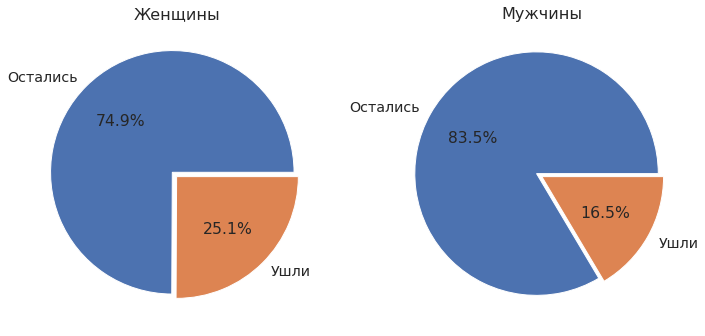

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].pie(
    gender_exited['Female'], 
    labels=['Остались', 'Ушли'], 
    autopct='%.1f%%', 
    explode= [0.05, 0]
);
axes[0].set_title('Женщины', fontsize=16)
axes[1].pie(
    gender_exited['Male'], 
    labels=['Остались', 'Ушли'], 
    autopct='%.1f%%', 
    explode= [0.05, 0]
);
axes[1].set_title('Мужчины', fontsize=16)

fig.show()

В данном графмке более четко можно проследить процент оттока среди женщин и мужчин в отдельности

# Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

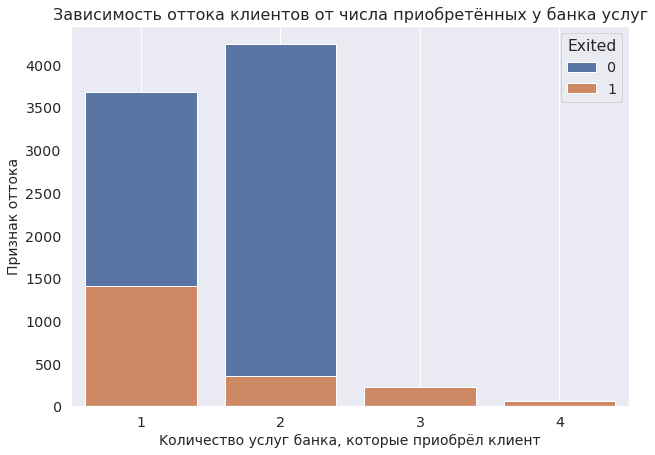

In [ ]:
grouped_row = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()
grouped_row = grouped_row.fillna(0)
fig, axes = plt.subplots( figsize=(10, 7))

barplot = sns.barplot(
    data=grouped_row,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
    orient='v',
    ci=None,
    dodge=False
)
barplot.tick_params(axis='x');
barplot.set_title('Зависимость оттока клиентов от числа приобретённых у банка услуг', fontsize=16);
barplot.set_xlabel('Kоличество услуг банка, которые приобрёл клиент', fontsize=14);
barplot.set_ylabel('Признак оттока', fontsize=14);
barplot.grid()

Даиграмма свидетельствует о том, что наиболее популярным для клиентов является набор из двух услуг. Числом услуг более двух польхзовались ушедшие клиенты. Клиенты с одной приобретенной услугой сильнее склонны к оттоку, чем клиенты с двумя

# Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных

In [ ]:
grouped_active = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()
grouped_active = grouped_active.fillna(0)
grouped_active

,IsActiveMember,Exited,CustomerId
0,0,0,3547
1,0,1,1302
2,1,0,4416
3,1,1,735


In [ ]:
from locale import normalize
grouped_active = churn_data[['Exited','IsActiveMember']].groupby('IsActiveMember')['Exited'].value_counts(normalize=True).unstack()
grouped_active = grouped_active.T
grouped_active

IsActiveMember,0,1
Exited,,
0,0.731491,0.857309
1,0.268509,0.142691


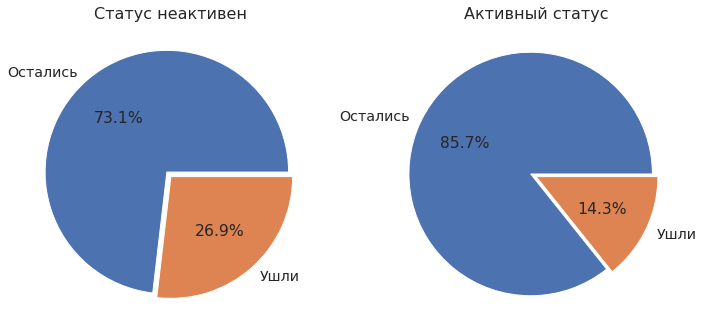

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
axes[0].pie(
    grouped_active[0], 
    labels=['Остались', 'Ушли'], 
    autopct='%.1f%%', 
    explode= [0.05, 0]
);
axes[0].set_title('Статус неактивен', fontsize=16)
axes[1].pie(
    grouped_active[1], 
    labels=['Остались', 'Ушли'], 
    autopct='%.1f%%', 
    explode= [0.05, 0]
);
axes[1].set_title('Активный статус', fontsize=16)

fig.show()

Графики свидетельствуют о том, что неактивные клиенты более склонны к оттоку нежеди клиенты банка со статусом активный. Таким образом, представителям банка стоит обратить внимание на клиентов, которые по той или иной причине начинают меньше пользоваться услугами банка. Возможно, стоит "напомнить о себе" рассылкой писем с антересным уникальным предложением.

# В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано

In [ ]:
pivot = churn_data.pivot_table(
    index=["day"],
    columns=["Geography"],
    values="tip_percentage",
    aggfunc=np.average)
sns.heatmap(pivot)

In [ ]:
grouped_geo = churn_data[['Geography', 'Exited']].groupby('Geography')['Exited'].value_counts(normalize=True).unstack()
grouped_geo = grouped_geo.T
grouped_geo

Geography,France,Germany,Spain
Exited,,,
0,0.838452,0.675568,0.833266
1,0.161548,0.324432,0.166734


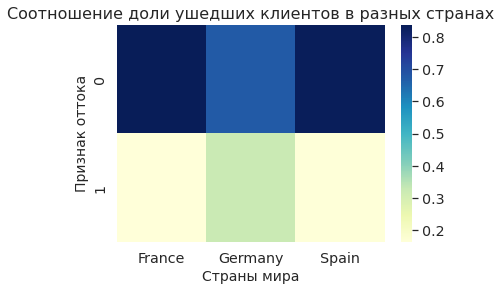

In [ ]:
heatmap = sns.heatmap(grouped_geo, cmap='YlGnBu')

heatmap.set_title('Соотношение доли ушедших клиентов в разных странах', fontsize=16);
heatmap.set_xlabel('Страны мира', fontsize=14);
heatmap.set_ylabel('Признак оттока', fontsize=14);
heatmap.grid()

Данный график свидетельствует о том, что во Франции и Испании процент ущедших клиентов выше, чем в Германии, следовательно именно в этих странах стоит наиболее детально пересмотреть актуальность предложенных услуг исходя из общей ситуации в каждой из стран. 

# Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга

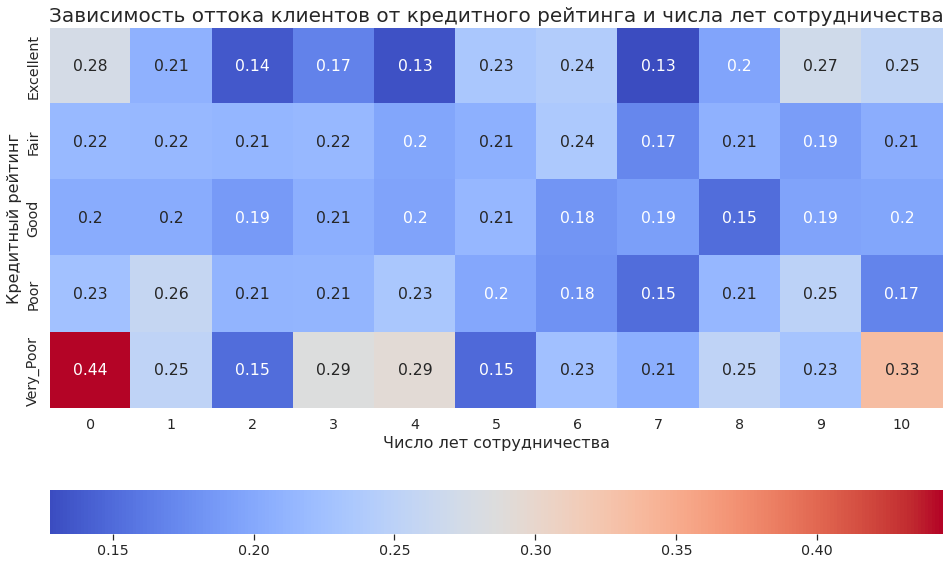

In [ ]:
def get_credit_score_cat(credit_score):
     if credit_score >= 300 and credit_score < 500:
         return "Very_Poor"
     elif credit_score >= 500 and credit_score < 601:
         return "Poor"
     elif credit_score >= 601 and credit_score < 661:
         return "Fair"
     elif credit_score >= 661 and credit_score < 781:
         return "Good"
     elif credit_score >= 851:
         return "Top"
     elif credit_score >= 781 and credit_score < 851:
         return "Excellent"
     elif credit_score < 300:
         return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
pivot = churn_data.pivot_table(
     values='Exited',
     index='CreditScoreCat',
     columns='Tenure'
 )
#fig = plt.figure()
fig, axes = plt.subplots( figsize=(16, 10))
heatmap = sns.heatmap(data=pivot, annot=True, cmap= 'coolwarm', cbar_kws= {'orientation': 'horizontal'});

heatmap.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества', fontsize=20);
heatmap.set_xlabel('Число лет сотрудничества', fontsize=16);
heatmap.set_ylabel('Кредитный рейтинг', fontsize=16);

fig.show()

Наиболее часто уходят клиенты с самым низким и самым высоким рейтингом в совокупности с самым небольшим числом и наоборот самым долгим числом лет обслуживания. Наиболее стабильнными и менее склонными к оттоку являются клиенты со средним кредитным рейтингом и средним числом лет обслуживания